In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jliu3627/Heart_Disease_Project/refs/heads/main/cleaned_heart_2022.csv')
df.head()

,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,347,Alabama,Female,Good,3.0,10.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


# Response Variable

The response variable HadHeartDisease will combine the HadHeartAttack and HadAngina features where "Yes" indicates the patient had heart disease and "No" indicates the patient did not have heart disease. If either column had "Yes", then HadHeartDisease will also be "Yes", otherwise HadHeartDisease will be "No".

In [ ]:
# df['HadHeartDisease'] = df['HadHeartAttack']
# df.drop(columns=['HadHeartAttack'], axis=1, inplace=True)
df['HadHeartDisease'] = df.apply(lambda x: 'Yes' if x['HadHeartAttack'] == 'Yes' or x['HadAngina'] == 'Yes' else 'No', axis=1)
df.drop(columns=['HadHeartAttack', 'HadAngina'], axis=1, inplace=True)

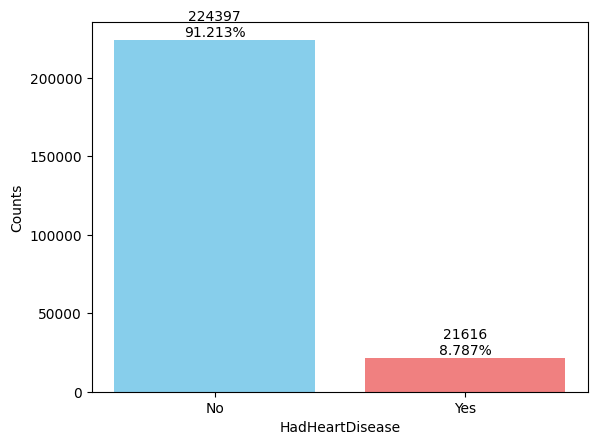

In [ ]:
plt.figure()

values, counts = np.unique(df['HadHeartDisease'], return_counts=True)
bars = plt.bar(range(len(counts)), counts, color=['skyblue', 'lightcoral'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}\n{yval/np.sum(counts)*100:.3f}%',
             ha='center', va='bottom')

plt.xlabel('HadHeartDisease')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Counts')
plt.show()

# Feature Variables

### Feature selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [ ]:
df.drop(columns=['State'], inplace=True, axis=1)

In [ ]:
ordinal_features = ['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'AgeCategory', 'TetanusLast10Tdap', 'CovidPos']
encoder = OrdinalEncoder(categories=[
    ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    ['Within past year (anytime less than 12 months ago)', 'Within past 2 years (1 year but less than 2 years ago)', 'Within past 5 years (2 years but less than 5 years ago)', '5 or more years ago'],
    ['None of them', '1 to 5', '6 or more, but not all', 'All'],
    ['No', 'No, pre-diabetes or borderline diabetes', 'Yes, but only during pregnancy (female)', 'Yes'],
    ['Never smoked', 'Former smoker', 'Current smoker - now smokes some days', 'Current smoker - now smokes every day'],
    ['Never used e-cigarettes in my entire life', 'Not at all (right now)', 'Use them every day', 'Use them some days'],
    ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older'],
    ['No, did not receive any tetanus shot in the past 10 years', 'Yes, received tetanus shot but not sure what type', 'Yes, received tetanus shot, but not Tdap', 'Yes, received Tdap'],
    ['No', 'Yes', 'Tested positive using home test without a health professional']
])
df[ordinal_features] = encoder.fit_transform(df[ordinal_features])

In [ ]:
numeric_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(exclude=['number']).columns

In [ ]:
scaler = StandardScaler()
# df_num = pd.DataFrame(scaler.fit_transform(df[numeric_features]), columns=numeric_features, index=df.index)
df_num = pd.DataFrame(df[numeric_features], columns=numeric_features, index=df.index)

In [ ]:
df_cat = pd.get_dummies(df[categorical_features], drop_first=True)

In [ ]:
df_combined = pd.concat([df_num, df_cat], axis=1)
df_combined.head()

,Unnamed: 0,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,SleepHours,RemovedTeeth,HadDiabetes,SmokerStatus,ECigaretteUsage,...,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AlcoholDrinkers_Yes,HIVTesting_Yes,FluVaxLast12_Yes,PneumoVaxEver_Yes,HighRiskLastYear_Yes,HadHeartDisease_Yes
0,342,3.0,4.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,...,False,False,False,True,False,False,True,True,False,False
1,343,3.0,0.0,0.0,0.0,6.0,0.0,3.0,1.0,0.0,...,False,False,False,True,False,False,True,True,False,False
2,345,3.0,0.0,0.0,0.0,8.0,2.0,0.0,1.0,0.0,...,False,False,False,True,True,False,False,True,False,False
3,346,1.0,5.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,True,True,False,False
4,347,2.0,3.0,10.0,0.0,5.0,1.0,0.0,0.0,0.0,...,False,False,False,True,False,False,True,True,False,False


In [ ]:
X = df_combined.drop(columns='HadHeartDisease_Yes', axis=1)
y = df_combined['HadHeartDisease_Yes'].values

### lasso regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

Lasso(alpha=0.01)

In [ ]:
importance = np.abs(lasso.coef_)

In [ ]:
features = X.columns
lasso_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
lasso_importance_df.head(10)

,Feature,Importance
0,Unnamed: 0,5.494009e-09
1,GeneralHealth,3.060618e-02
2,PhysicalHealthDays,5.468719e-03
3,MentalHealthDays,0.000000e+00
4,LastCheckupTime,0.000000e+00
5,SleepHours,0.000000e+00
6,RemovedTeeth,1.007986e-02
7,HadDiabetes,1.466281e-02
8,SmokerStatus,0.000000e+00
9,ECigaretteUsage,0.000000e+00


In [ ]:
selected_features = lasso_importance_df[lasso_importance_df['Importance'] > 0].sort_values(
    by='Importance',
    ascending=True
)

In [ ]:
print("Selected Features by Lasso Regression:")
print(selected_features)

Selected Features by Lasso Regression:
               Feature    Importance
0           Unnamed: 0  5.494009e-09
12   WeightInKilograms  1.021178e-03
13                 BMI  2.720819e-03
2   PhysicalHealthDays  5.468719e-03
6         RemovedTeeth  1.007986e-02
10         AgeCategory  1.401141e-02
7          HadDiabetes  1.466281e-02
31       ChestScan_Yes  2.622983e-02
1        GeneralHealth  3.060618e-02


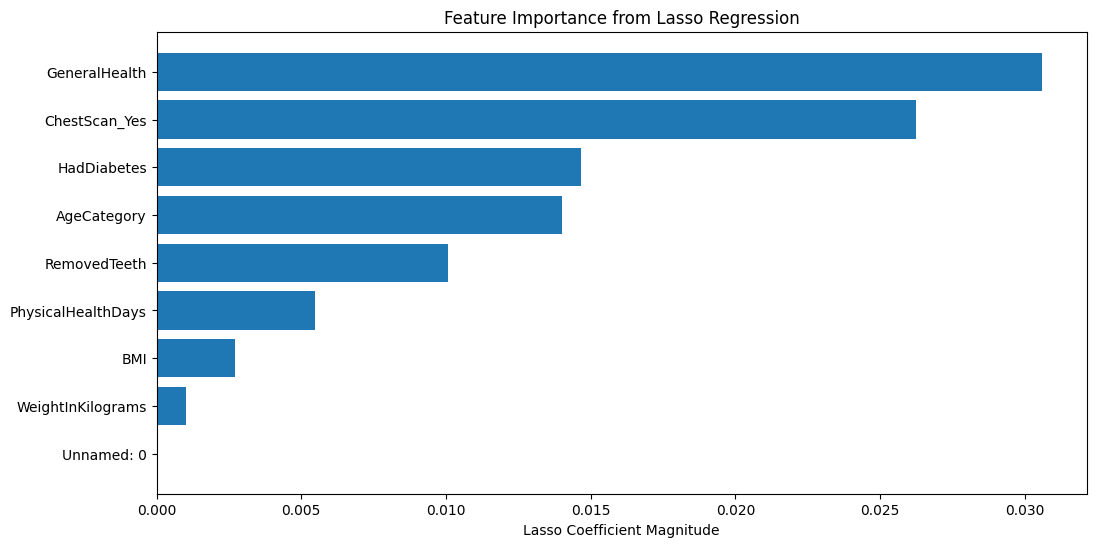

In [ ]:
# plot the importance
plt.figure(figsize=(12, 6))
plt.barh(selected_features['Feature'], selected_features['Importance'])
plt.xlabel('Lasso Coefficient Magnitude')
plt.title('Feature Importance from Lasso Regression')
plt.show()

**Findings**
- GeneralHealth (coefficient ≈ 0.030): The strongest predictor, suggesting that a person's general health status has the highest impact on heart disease risk.
- ChestScan_Yes (coefficient ≈ 0.025): The second most important feature, indicating that having had a chest scan is strongly correlated with heart disease risk.
- HadDiabetes (coefficient ≈ 0.015): Having diabetes shows moderate importance, suggesting a significant correlation with heart disease.
- AgeCategory (coefficient ≈ 0.015): Similar importance to diabetes, confirming that age is a significant risk factor.
- RemovedTeeth (coefficient ≈ 0.010): Shows moderate importance, suggesting a potential link between dental health and heart disease.   
- PhysicalHealthDays (coefficient ≈ 0.005): Has lower importance but still relevant.
- BMI (coefficient ≈ 0.003): Relatively low importance.
- WeightInKilograms (coefficient ≈ 0.001): The least important among the selected features.

### columns of interest

In [ ]:
cols = [
    'Sex_Male',
    'GeneralHealth',
    'PhysicalHealthDays',
    'MentalHealthDays',
    'LastCheckupTime',
    'SleepHours',
    'HadStroke_Yes',
    'SmokerStatus',
    'ECigaretteUsage',
    'ChestScan_Yes',
    'RaceEthnicityCategory_Hispanic',
    'RaceEthnicityCategory_Multiracial, Non-Hispanic',
    'RaceEthnicityCategory_Other race only, Non-Hispanic',
    'RaceEthnicityCategory_White only, Non-Hispanic',
    'AgeCategory',
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HighRiskLastYear_Yes',
    # 'HadAngina_Yes'
]

In [ ]:
heart_df = df_combined[cols]
heart_df.head()

,Sex_Male,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,SleepHours,HadStroke_Yes,SmokerStatus,ECigaretteUsage,ChestScan_Yes,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AgeCategory,HeightInMeters,WeightInKilograms,BMI,HighRiskLastYear_Yes
0,False,3.0,4.0,0.0,0.0,9.0,False,1.0,0.0,False,False,False,False,True,9.0,1.60,71.67,27.99,False
1,True,3.0,0.0,0.0,0.0,6.0,False,1.0,0.0,False,False,False,False,True,10.0,1.78,95.25,30.13,False
2,True,3.0,0.0,0.0,0.0,8.0,False,1.0,0.0,True,False,False,False,True,11.0,1.85,108.86,31.66,False
3,False,1.0,5.0,0.0,0.0,9.0,False,0.0,0.0,False,False,False,False,True,12.0,1.70,90.72,31.32,False
4,False,2.0,3.0,10.0,0.0,5.0,False,0.0,0.0,False,False,False,False,True,12.0,1.55,79.38,33.07,False


# Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
X = heart_df
y = df_combined['HadHeartDisease_Yes'].values

In [ ]:
smote = SMOTE(sampling_strategy=0.4, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X_scaled_smote = scaler.fit_transform(X_smote)
X_scaled = scaler.fit_transform(X)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_scaled_smote, y_smote, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# rf = RandomForestClassifier(n_estimators=20, criterion='entropy', max_depth=30, max_leaf_nodes=2, max_features='sqrt', class_weight='balanced')
rf = RandomForestClassifier(criterion='entropy', max_features='sqrt', class_weight='balanced')

imbalanced

In [ ]:
train_accuracies = []
test_accuracies = []

# Train the model for different numbers of trees and record accuracies
for n_estimators in range(1, 10):
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)

    # Predict on the training set
    train_pred = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on the testing set
    test_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

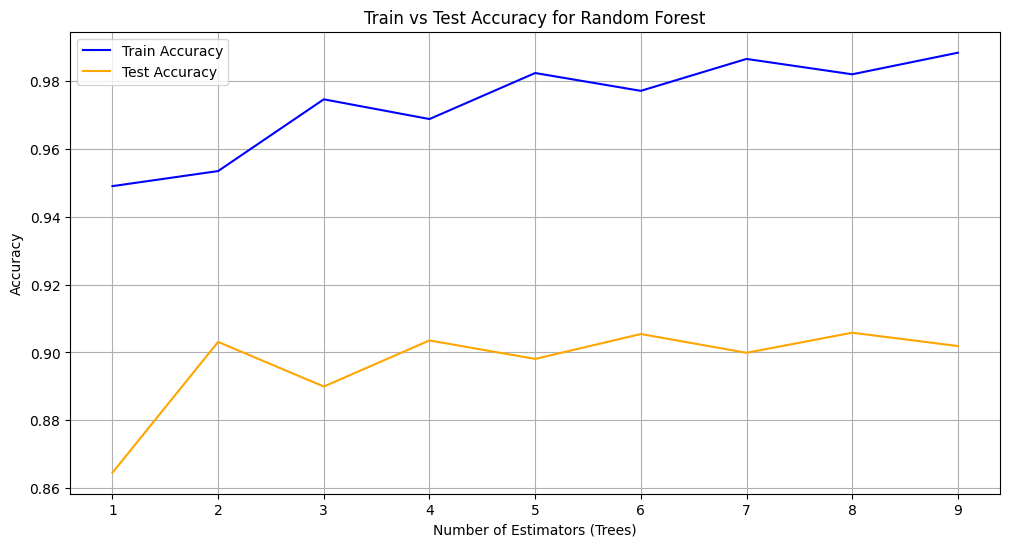

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, 10), test_accuracies, label='Test Accuracy', color='orange')
plt.title('Train vs Test Accuracy for Random Forest')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

**Findings**
This plot shows the training vs testing accuracy of a Random Forest model as the number of trees (estimators) increases from 1 to 9 for imbalanced data.
- The training accuracy (blue line) demonstrates strong performance, starting at 95% and exceed 98% with additional trees. However, the testing accuracy (orange line) tells a different accuracy, beginning at 86% and stabilizing around 90% after just 2-3 trees, with minimal improvement thereafter.
- The notable gap between training (98%) and testing (90%) accuracy suggests significant overfitting, indicating that the model is memorizing training data patterns rather than learning generalizable features.
- Additional trees beyond 3-4 don't substantially improve test performance
- Common in imbalanced datasets, where the model may become biased toward the majority class.

In [ ]:
ypred_rf = rf.predict(X_test)

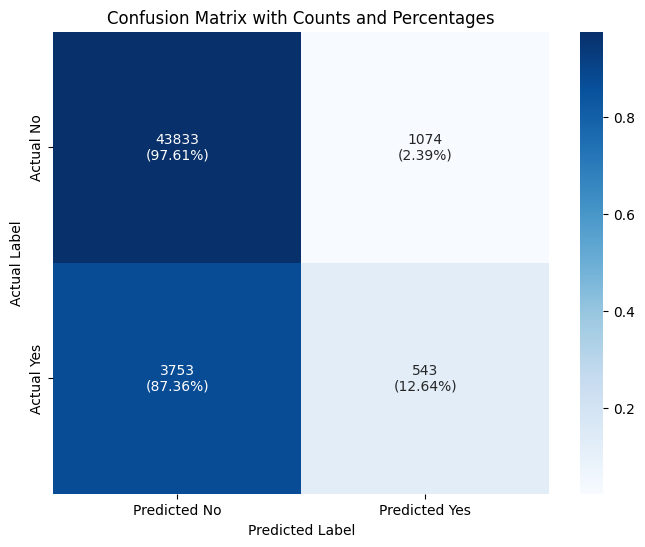

In [ ]:
cm = confusion_matrix(y_test, ypred_rf)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Findings**  
The model is very good at identifying non-heart disease cases (97.56% accuracy), it struggles significantly with identifying actual heart disease cases, missing about 86.71% of them, which suggests a strong class imbalance problem and indicates that the model might need improvement in its ability to detect positive cases of heart disease.

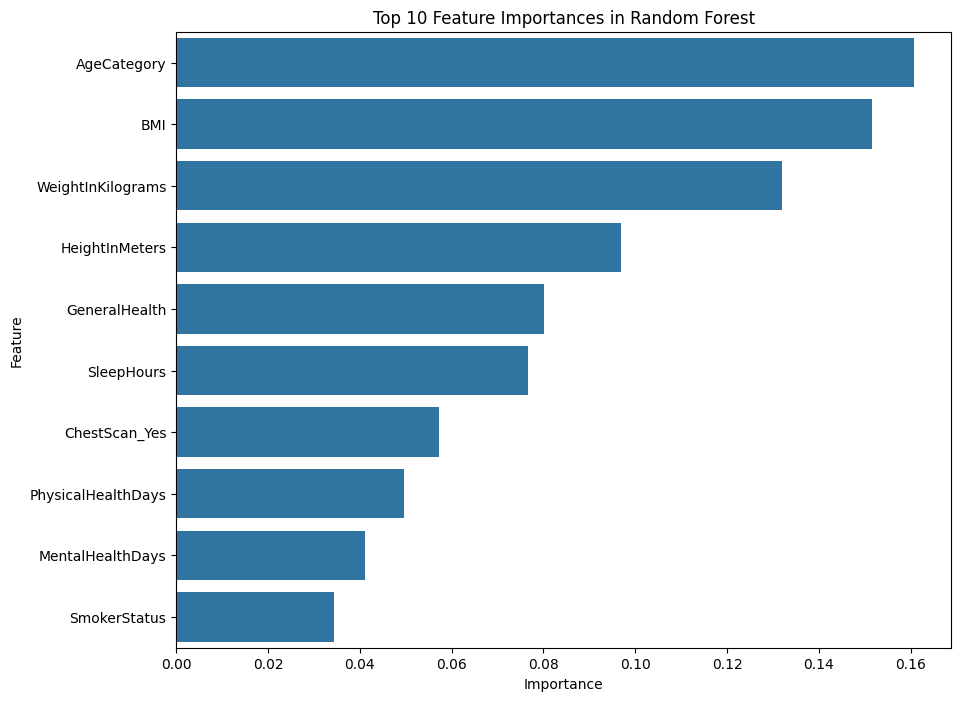

In [ ]:
feature_importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Adjust head(n) to show top n features
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Findings**  

- AgeCategory (importance ≈ 0.175): Stands out as the most influential feature, suggesting that age is the strongest predictor of heart disease risk.
- BMI (importance ≈ 0.165): Body Mass Index is the second most important feature, indicating a strong relationship between body composition and heart disease.
- WeightInKilograms (importance ≈ 0.145): Closely related to BMI, weight is also a significant predictor.
- HeightInMeters (importance ≈ 0.105): Physical stature plays a moderate role in prediction.
- SleepHours (importance ≈ 0.085): Sleep duration shows moderate importance, suggesting a link between sleep patterns and heart health.
- GeneralHealth (importance ≈ 0.075): Overall health status has moderate predictive power.
- ChestScan_Yes (importance ≈ 0.060): Whether someone has had a chest scan shows moderate importance.
- PhysicalHealthDays (importance ≈ 0.055): Number of days with physical health issues has some predictive value.
- MentalHealthDays (importance ≈ 0.040): Mental health shows lower but still relevant importance.
- SmokerStatus (importance ≈ 0.030): Smoking status has the lowest importance among the top 10 features.  

**Overall**, the ranking differs from the Lasso regression results, particularly in the relative importance of features like GeneralHealth and ChestScan_Yes, suggesting that different models capture different aspects of the relationships between features and heart disease risk.

balanced (smote)

In [ ]:
train_accuracies = []
test_accuracies = []

# Train the model for different numbers of trees and record accuracies
for n_estimators in range(1, 10):
    rf.n_estimators = n_estimators
    rf.fit(X_train_smote, y_train_smote)

    # Predict on the training set
    train_pred = rf.predict(X_train_smote)
    train_accuracy = accuracy_score(y_train_smote, train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on the testing set
    test_pred = rf.predict(X_test_smote)
    test_accuracy = accuracy_score(y_test_smote, test_pred)
    test_accuracies.append(test_accuracy)

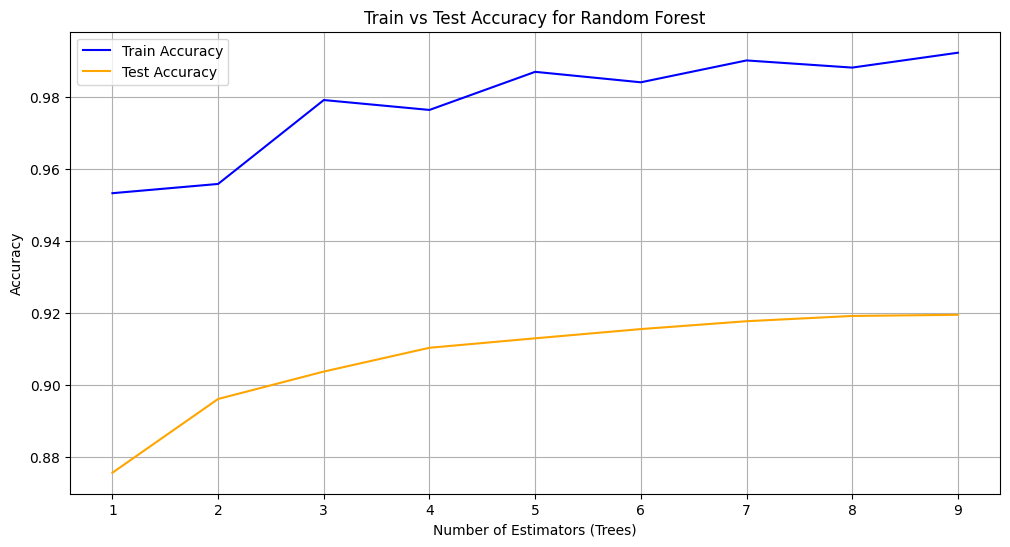

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, 10), test_accuracies, label='Test Accuracy', color='orange')
plt.title('Train vs Test Accuracy for Random Forest')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

**Findings**  
The Train vs Test Accuracy plot for the Random Forest model with balanced data demonstates that significant improvements in model performance compared to the imbalanced version. The gap between training (99%) and testing (91%) accuracy is smaller than in the imbalanced case, suggesting reduced overfitting. The model's performance tends to stabilize after 3-4 trees.

In [ ]:
ypred_rf = rf.predict(X_test_smote)

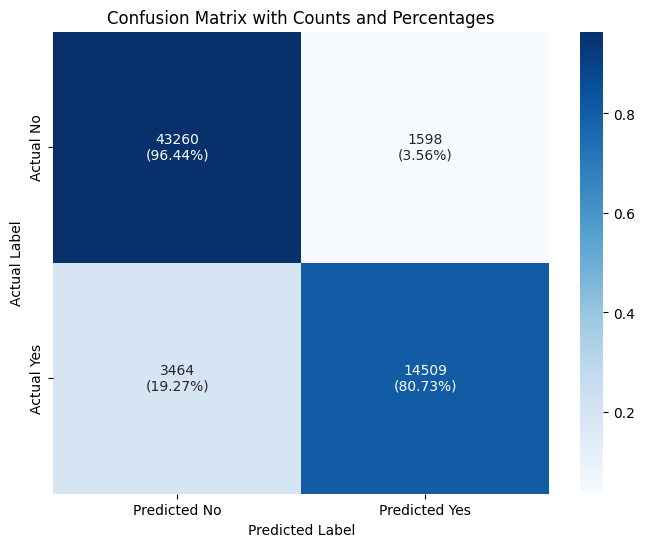

In [ ]:
cm = confusion_matrix(y_test_smote, ypred_rf)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Findings**  
The balanced data has led to a much more equitable performance, particularly in identifying heart disease cases (increasing from 13.29%(imbalanced) to 80.57% accuracy), while maintaining strong performance in identifying non-heart disease cases. Addressing the class imbalance has significantly enhanced the model's ability to detect heart disease.

In [ ]:
ypred_rf = rf.predict(X_test)

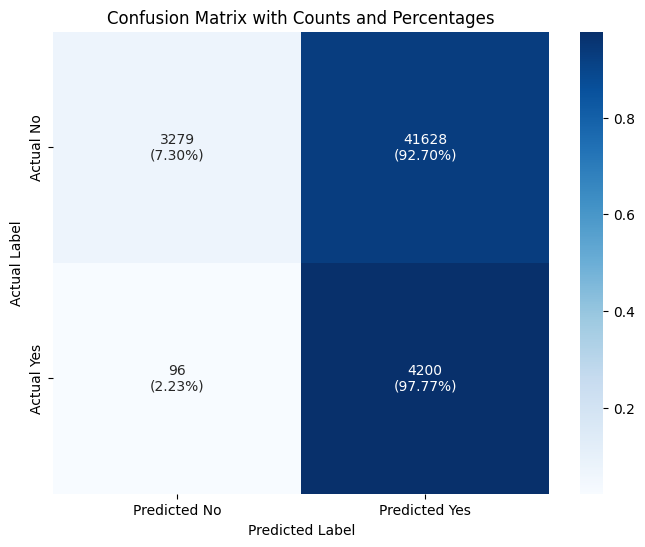

In [ ]:
cm = confusion_matrix(y_test, ypred_rf)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Findings**  
While the model shows excellent performance in identifying heart disease cases (97.02% accuracy) and very high false positive rate (87.34%). This suggests that while balancing the data has improved the model's ability to detect heart disease, it has done so at the cost of specificity, leading to many false alarms.

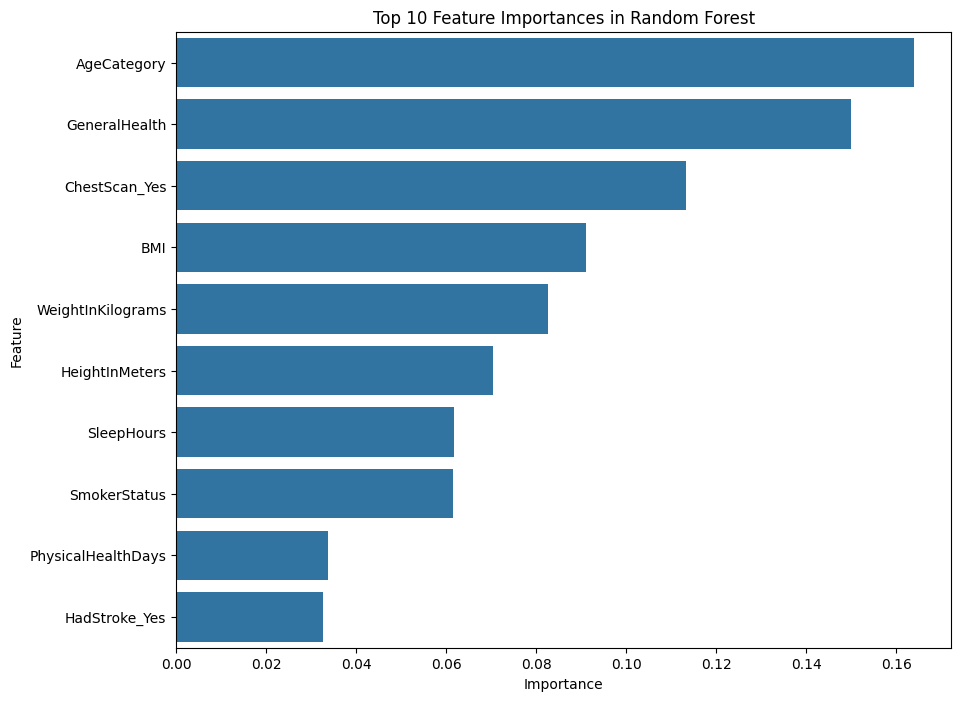

In [ ]:
feature_importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Adjust head(n) to show top n features
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Findings**  
The top 10 most important features in the Random Forest model after balancing the data:  

- AgeCategory (importance ≈ 0.15): Remains the most influential predictor of heart disease.
- ChestScan_Yes (importance ≈ 0.14): Has significantly increased in importance, now second most important.
- GeneralHealth (importance ≈ 0.13): Also gained importance, now third most important.
- BMI (importance ≈ 0.10): Dropped from second to fourth place but still significant.
- WeightInKilograms (importance ≈ 0.09): Maintains moderate importance.
- HeightInMeters (importance ≈ 0.08): Similar importance level as before.
- SmokerStatus (importance ≈ 0.08): Moved up in importance compared to unbalanced data.
- SleepHours (importance ≈ 0.07): Dropped slightly in relative importance.
- HadStroke_Yes (importance ≈ 0.04): New entry in the top 10.
- PhysicalHealthDays (importance ≈ 0.04): Dropped in relative importance.  

The balanced dataset has led to a reordering of feature importances, with medical history factors (ChestScan, GeneralHealth) gaining prominence while some physical measurements (BMI, weight) have relatively decreased in importance, which suggests that balancing the data has helped the model better recognize the significance of direct medical indicators of heart disease.

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
log_reg = LogisticRegression(random_state=42, class_weight='balanced')

In [ ]:
param_grid = {
    'solver': ['liblinear'],
    'C': [0.01, 0.01, 0.1, 1],
    'penalty': ['l2'],
    'max_iter': [100, 500]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=0
)

imbalanced

In [ ]:
log_reg = LogisticRegression(random_state=42, class_weight='balanced')

In [ ]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=0
)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.01, 0.1, 1], 'max_iter': [100, 500],
                         'penalty': ['l2'], 'solver': ['liblinear']})

In [ ]:
print(grid_search.best_params_)
best_log_reg = grid_search.best_estimator_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
ypred_log_reg = best_log_reg.predict(X_test)

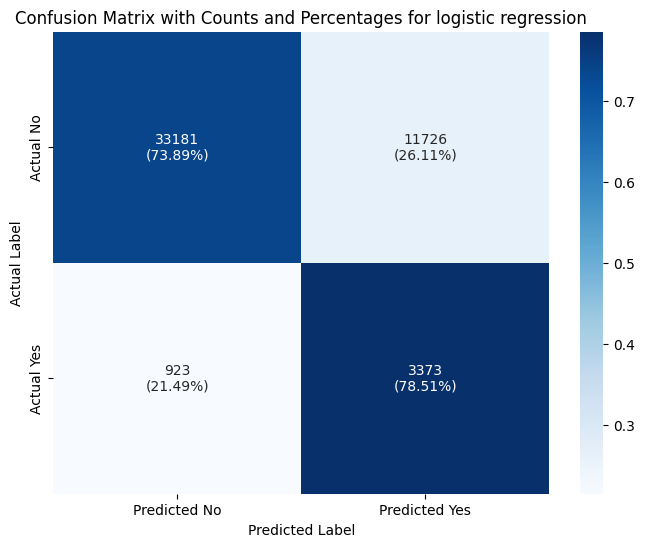

In [ ]:
cm = confusion_matrix(y_test, ypred_log_reg)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages for logistic regression")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Findings**  
It maintains good accuracy in identifying both positive and negative cases (78.51% and 73.89% respectively), suggesting a more equitable trade-off between sensitivity and specificity. While the false positive rate (26.11%) is higher than ideal, it's significantly better than the Random Forest's false positive rate

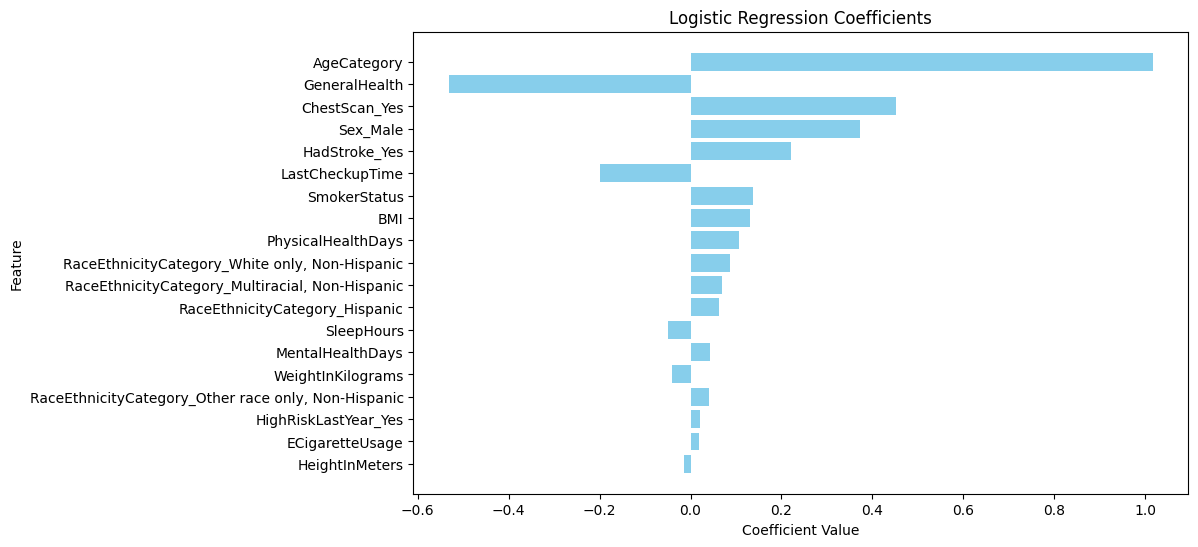

In [ ]:
feature_names = cols
coefficients =best_log_reg.coef_.flatten()

# Create a DataFrame for easy manipulation
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of the coefficients to find the most impactful ones
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

**Findings**  
This model with imbalanced data suggests that age, medical history (chest scans, strokes), gender, and general health status are the most important factors in predicting heart disease, while lifestyle factors and demographics have comparatively smaller effects.

balanced (smote)

In [ ]:
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.01, 0.1, 1], 'max_iter': [100, 500],
                         'penalty': ['l2'], 'solver': ['liblinear']})

In [ ]:
print(grid_search.best_params_)
best_log_reg = grid_search.best_estimator_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
ypred_log_reg = best_log_reg.predict(X_test_smote)

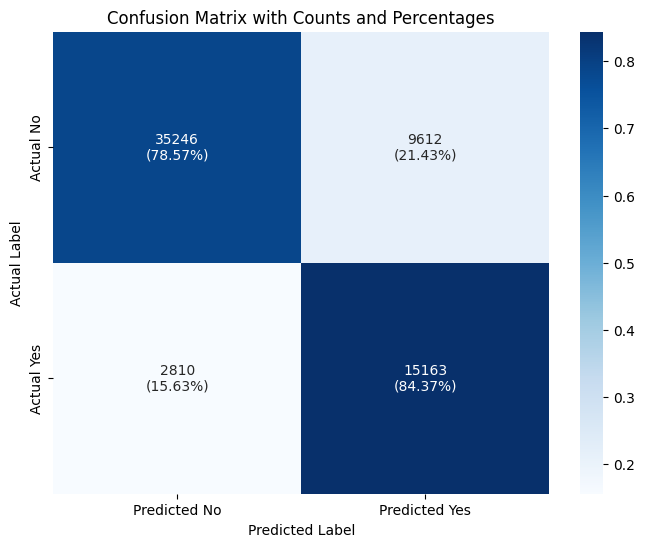

In [ ]:
cm = confusion_matrix(y_test_smote, ypred_log_reg)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Findings**  
The SMOTE-balanced model shows significant improvements:
- Better balanced performance between classes
- High accuracy in both positive (84.37%) and negative (78.57%) predictions
- Lower false positive rate compared to regular balancing
- Improved false negative rate
- Overall more reliable predictions across both classes  

SMOTE was effective in addressing the class imbalance while maintaining good predictive performance

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

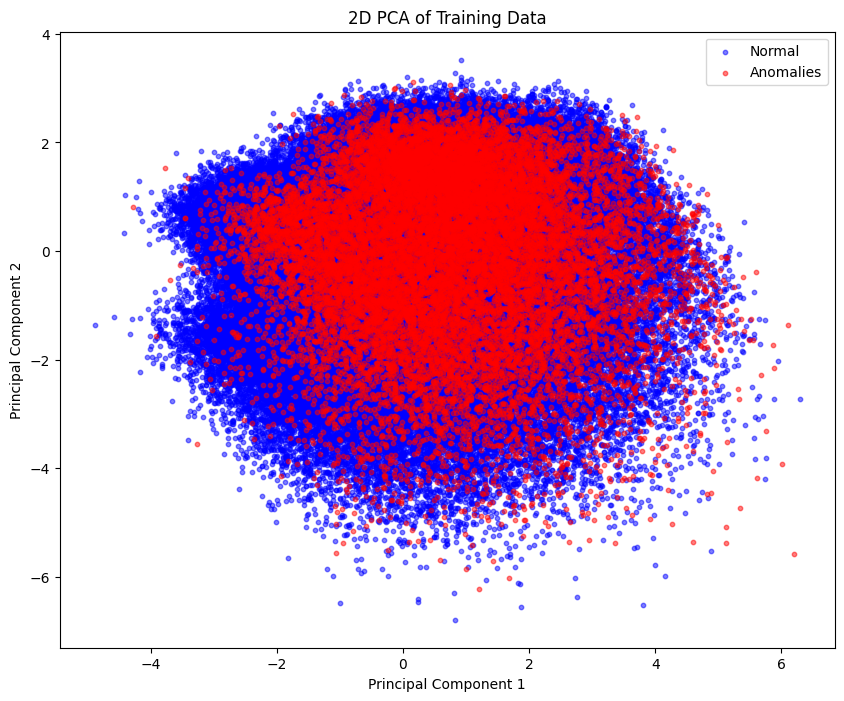

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[y_train == 0, 0], X_pca[y_train == 0, 1],
            label="Normal", alpha=0.5, s=10, color='blue')
plt.scatter(X_pca[y_train == 1, 0], X_pca[y_train == 1, 1],
            label="Anomalies", alpha=0.5, s=10, color='red')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA of Training Data")
plt.legend()
plt.show()

**Findings**  

 - There is substantial overlap between the red and blue points, indicating that heart disease and non-heart disease cases share many similar characteristics even when viewed in the reduced dimensional space.
 - Points spread from approximately -4 to 6 on Component 1, and points spread from approximately -4 to 6 on Component 2.
 - There is no clear separation between classes indicating that multiple factors interact in subtle ways to contribute to heart disease risk.

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

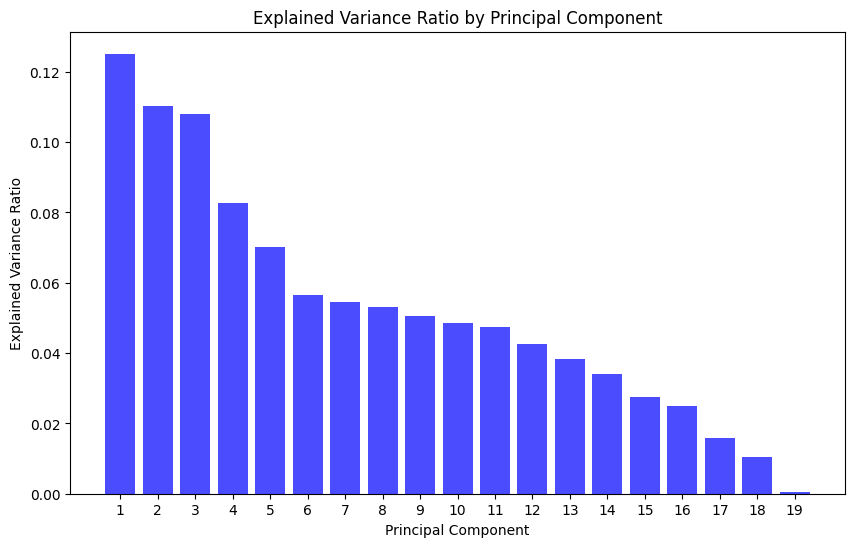

In [ ]:
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance for each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.show()

**Findings**  
- The first 5 components together explain about 49% of the total variance
- There's a relatively gradual decline rather than a sharp drop-off, indicating that many features contribute meaningful information.  

Overall,  heart disease prediction requires considering multiple factors, as no single component or small set of components captures the majority of the variation in the data.

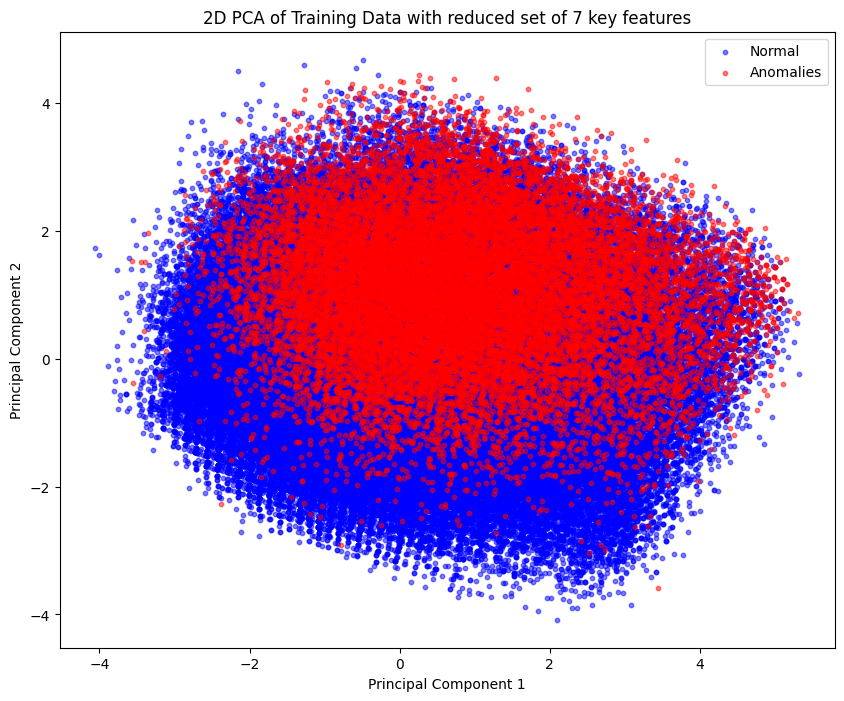

In [ ]:
test_cols = [
    'HeightInMeters',
    'WeightInKilograms',
    'GeneralHealth',
    'HadDiabetes',
    'ChestScan_Yes',
    'AgeCategory',
    'BMI',
]
pca = PCA()
scaler = StandardScaler()
X_pca = pca.fit_transform(scaler.fit_transform(df_combined[test_cols]))

plt.figure(figsize=(10, 8))
# plt.scatter(X_pca[df_combined['HadHeartDisease_Yes'] == 1, 0], X_pca[df_combined['HadHeartDisease_Yes'] == 1, 1],
#             label="Anomalies", alpha=0.5, s=10, color='red')
plt.scatter(X_pca[df_combined['HadHeartDisease_Yes'] == 0, 0], X_pca[df_combined['HadHeartDisease_Yes'] == 0, 1],
            label="Normal", alpha=0.5, s=10, color='blue')
plt.scatter(X_pca[df_combined['HadHeartDisease_Yes'] == 1, 0], X_pca[df_combined['HadHeartDisease_Yes'] == 1, 1],
            label="Anomalies", alpha=0.5, s=10, color='red')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA of Training Data with reduced set of 7 key features")
plt.legend()
plt.show()

**Findings**  
Using a reduced set of 7 key features: height, weight, general health, diabetes status, chest scan status, age category, and BMI:
 - Normal cases (blue) and heart disease cases (red) show significant overlap.
 - The spread is roughly from -4 to 4 on both principal components.
 - The overlap suggests that even these carefully selected features don't provide clear linear separation between classes


# Visualizations

### General Health by Heart Disease Status

In [ ]:
# Generate sample data
np.random.seed(2024)
data = pd.DataFrame({
    'AgeCategory': np.random.choice(['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+'], 500),
    'HadHeartAttack': np.random.choice(['Yes', 'No'], 500, p=[0.3, 0.7]),
    'PhysicalHealthlyDays': np.random.randint(0, 30, 500),
    'MentalHealthlyDays': np.random.randint(0, 30, 500)
})

In [ ]:
# Convert age categories to approximate midpoints for histogram
age_map = {
    '18-24': 21, '25-34': 29, '35-44': 39,
    '45-54': 49, '55-64': 59, '65-74': 69, '75+': 80}
data['AgeMidpoint'] = data['AgeCategory'].map(age_map)

In [ ]:
# Generating a more detailed sample dataset based on heart disease risk factors
data_detailed = pd.DataFrame({
    'AgeCategory': np.random.choice(['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+'], 500),
    'Sex': np.random.choice(['Male', 'Female'], 500),
    'GeneralHealth': np.random.choice(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'], 500),
    'PhysicalHealthlyDays': np.random.randint(0, 30, 500),
    'MentalHealthlyDays': np.random.randint(0, 30, 500),
    'HadHeartAttack': np.random.choice(['Yes', 'No'], 500, p=[0.3, 0.7]),
    'HadStroke': np.random.choice(['Yes', 'No'], 500, p=[0.1, 0.9]),
    'HadDiabetes': np.random.choice(['Yes', 'No'], 500, p=[0.2, 0.8]),
    'SmokerStatus': np.random.choice(['Current', 'Former', 'Never'], 500),
    'SleepHours': np.random.uniform(4, 10, 500)
})
data_detailed['AgeMidpoint'] = data_detailed['AgeCategory'].map(age_map)

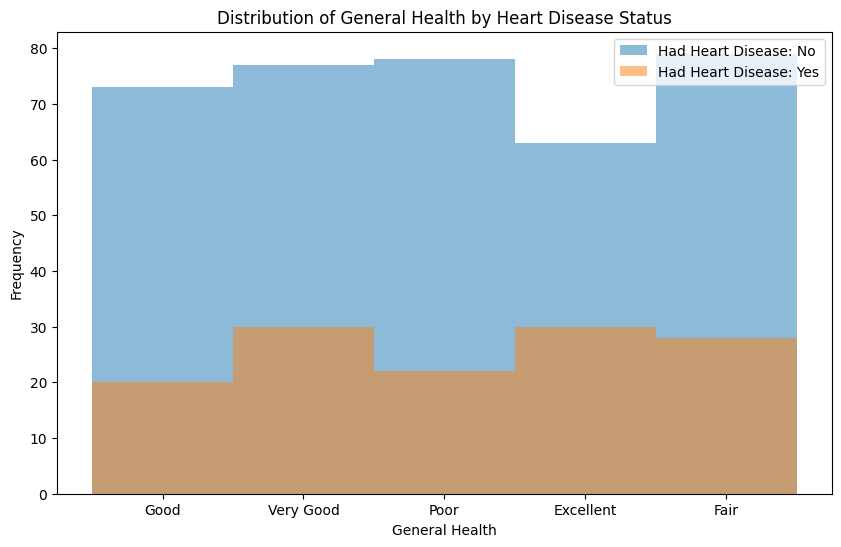

In [ ]:
# distribution of General Health by Heart Disease Status
plt.figure(figsize=(10, 6))
for label, df in data_detailed.groupby('HadHeartAttack'):
    plt.hist(df['GeneralHealth'], bins=np.arange(len(df['GeneralHealth'].unique()) + 1) - 0.5, alpha=0.5,
             label=f"Had Heart Disease: {label}")

plt.xlabel('General Health')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(data_detailed['GeneralHealth'].unique())), labels=data_detailed['GeneralHealth'].unique())
plt.title('Distribution of General Health by Heart Disease Status')
plt.legend()
plt.show()

**Findings**  
This fig. 1 of histogram compares the distribution of general health levels among individuals with and without heart disease. It emphasizes the variation in self-reported health quality between these two groups, potentially highlighting that poorer health may correlate with a higher incidence of heart disease.

<Figure size 1000x600 with 0 Axes>

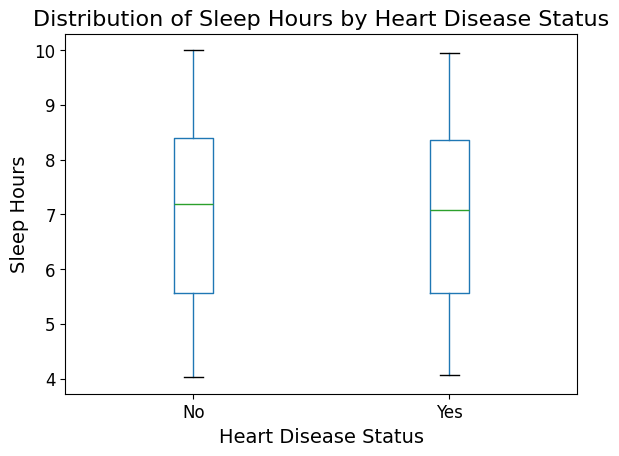

In [ ]:
# Sleep Hours by Heart Disease Status
plt.figure(figsize=(10, 6))
data_detailed.boxplot(column='SleepHours', by='HadHeartAttack', grid=False)
plt.title('Distribution of Sleep Hours by Heart Disease Status', fontsize=16)
plt.suptitle("")
plt.xlabel('Heart Disease Status', fontsize=14)
plt.ylabel('Sleep Hours', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Findings**  

**Median Sleep Hours:** A lower median for heart disease patients could suggest an association between reduced sleep and heart disease risk.

**Outliers:** More low-sleep outliers in the heart disease group might highlight a trend of insufficient sleep linked to heart disease.

**Distribution:** Significant differences in sleep distribution between the groups could suggest that sleep duration is a factor in heart disease.

### AgeCategory and GeneralHealth

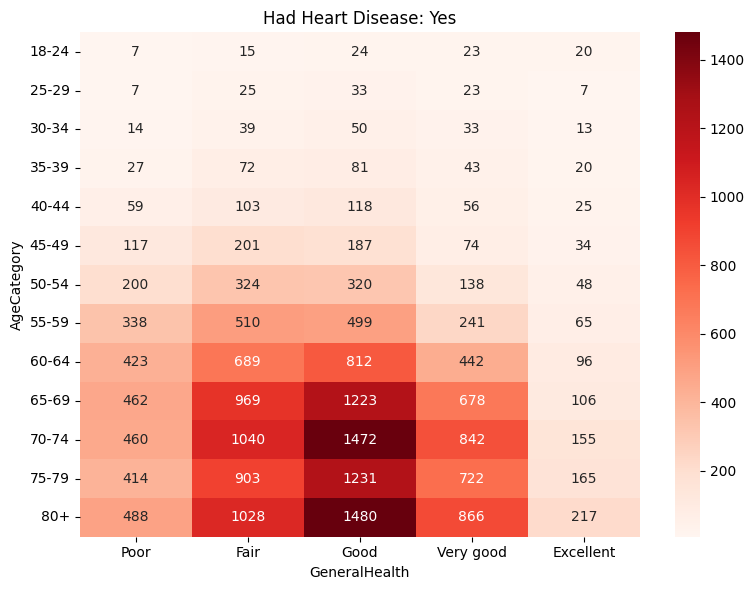

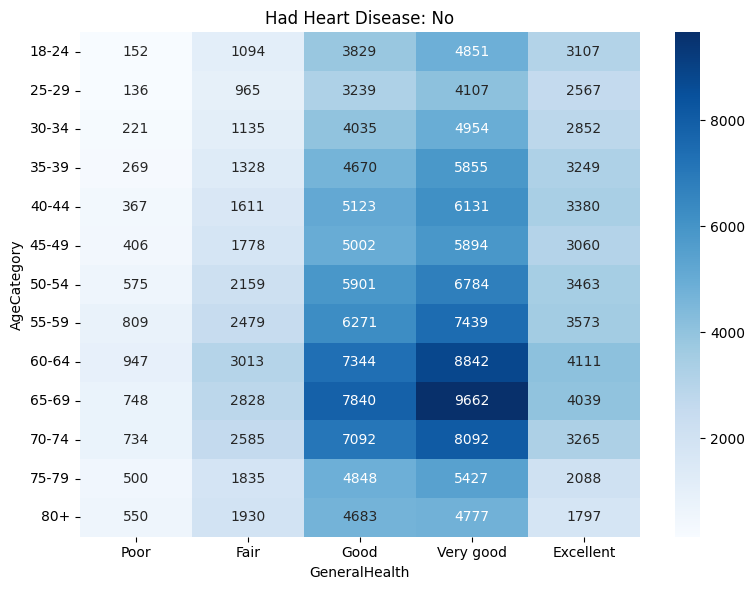

In [ ]:
general_health_labels = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
age_category_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                       '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

heart_disease_yes = X[y == 1]
heart_disease_no = X[y == 0]

# cross-tab calculations
cross_tab_yes = pd.crosstab(heart_disease_yes['AgeCategory'], heart_disease_yes['GeneralHealth'])
cross_tab_no = pd.crosstab(heart_disease_no['AgeCategory'], heart_disease_no['GeneralHealth'])
cross_tab_total = cross_tab_yes.add(cross_tab_no, fill_value=0)

cross_tab_yes_normalized = cross_tab_yes / cross_tab_total * 100
cross_tab_no_normalized = cross_tab_no / cross_tab_total * 100

# Yes counts heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_yes, annot=True, cmap="Reds", fmt="d",
            xticklabels=general_health_labels, yticklabels=age_category_labels)
plt.title("Had Heart Disease: Yes")
plt.xlabel("GeneralHealth")
plt.ylabel("AgeCategory")
plt.tight_layout()
plt.show()

# No counts heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_no, annot=True, cmap="Blues", fmt="d",
            xticklabels=general_health_labels, yticklabels=age_category_labels)
plt.title("Had Heart Disease: No")
plt.xlabel("GeneralHealth")
plt.ylabel("AgeCategory")
plt.tight_layout()
plt.show()

**Findings**  
Theese heatmap visualizations reveal compelling patterns in the relationship between age, general health status, and heart disease occurrence.  

1. **Heatmap (had heart disease: Yes)**:  
- The data shows a clear and strong correlation with age, with the highest concentrations of heart disease cases appearing in the 65-80+ age ranges. The peak occurs in the 70-74 age group, particularly among those reporting "Good" health (1,472 cases), while very few cases are reported in younger age groups (18-34). There's a notable inflection point around age 50, after which heart disease cases increase substantially across all health categories.  
- the "Good" health category consistently shows the highest numbers across most age groups, with "Fair" and "Very good" categories showing moderate numbers. Interestingly, the "Excellent" health category consistently shows the lowest numbers across all ages, while "Poor" health shows moderate numbers, especially in older age groups. The highest concentrations of cases are found in three key groups: the 70-74 age group with "Good" health (1,472 cases), those 80+ with "Good" health (1,480 cases), and the 65-69 age group with "Good" health (1,223 cases).
- The visualization demonstrates a distinctive diagonal pattern, showing higher numbers in middle health ratings for older ages, with lower numbers in extreme health ratings (Poor and Excellent), suggesting that while age is a dominant factor in heart disease risk, general health status plays a significant modulating role. Notably, even individuals reporting "Very good" or "Excellent" health show increased heart disease risk with age, underlining the powerful influence of aging on heart disease occurrence regardless of perceived health status.

2. **Heatmap (had heart disease: No)**:  
- shows a strong concentration in the middle-age groups, particularly between ages 55-69, with peak numbers occurring in the 65-69 age group reporting "Very good" health (9,662 cases). The data demonstrates a clear preference for better health ratings, with "Very good" health consistently showing the highest numbers across most age groups, followed by "Good" health.
- the age patterns shows that with numbers increasing from younger ages (18-24) to middle age, peaking in the 60-69 age range, and then declining in the older age groups (75+). The highest concentrations are found in three key groups: ages 65-69 with "Very good" health (9,662 cases), ages 60-64 with "Very good" health (8,842 cases), and ages 70-74 with "Very good" health (8,092 cases). This suggests that maintaining good health into middle and early senior years is particularly important for heart disease prevention.
- The visualization demonstrates a distinctive peak pattern, showing the highest concentrations in "Very good" and "Good" health ratings for middle-age groups (55-69), with consistently lower numbers in "Poor" and "Fair" health ratings across all ages. This suggests that while age is a significant factor in heart disease prevention, maintaining better general health status plays a crucial protective role. Also, the pattern also reveals that even those with excellent health ratings show declining numbers in older age groups (75+), suggesting that age-related factors eventually influence heart disease risk regardless of health status, though maintaining better health appears to offer significant protection throughout life.

### **Overall findings**  

- Lasso Regression model demonstrated the General Health Staus as the strongest predictor of heart disease. and reinforced that overall self-reported health has a strong impact on heart disease risk.
- Both Random Forest and Logistic Regression emphasized "AgeCategory", "ChestScan", and "HadDiabetes" as influential features, indicating that **"age"** and **"prior medical conditions"** are pivotal in assessing heart disease risk.  

- Addressing Class Imbalance:
    - Initial Imbalance: The Random Forest model showed significant overfitting with high training accuracy (98%) but lower testing accuracy (90%), reflecting a bias towards the majority class.
    - Balanced Data Impact: SMOTE effectively improved the model's ability to detect heart disease, boosting positive case identification from 13.29% (imbalanced) to 80.57% (balanced) while reducing overfitting.

- PCA Analysis:
    - PCA revealed significant overlap between heart disease and non-heart disease cases, suggesting that predicting heart disease involves multiple interacting factors. No single component or limited set of features could fully separate the classes.

- Visualization Highlights:
    - Heatmap visualizations illustrated "age" and "general health" a clear pattern where heart disease cases increase notably in the 65-80+ age groups, especially among those reporting "Good" health. This reinforces the importance of both age and general health as risk factors.
    - A lower median sleep hours was associated with heart disease cases, indicating insufficient sleep may be linked to higher risk.

Overall, it demonstrates that age, general health, and medical history are critical factors in heart disease prediction. The findings indicate that comprehensive risk assessment should prioritize medical history, age, and lifestyle factors for more reliable heart disease prediction.
